In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [54]:
NYSE_Weather = pd.read_csv('../data/NYSE_Weather.csv')
NYSE_Weather.head()

,Date,Open,Close,Volume,Returns,Hours_of_Sunlight,temp,humidity,precip,preciptype,snow,windspeed,cloudcover,visibility,sunrise,sunset,conditions,description
0,1985-01-03,1005.030029,1005.030029,0.0,-0.398390,09:20:42,0.3,54.6,0.000,NaN,NaN,26.2,100.0,25.2,07:20:26,16:41:08,Overcast,Cloudy skies throughout the day.
1,1985-01-04,1000.270020,1000.270020,0.0,-0.473619,09:21:36,-1.1,58.1,1.247,"rain,snow",NaN,23.0,99.1,18.9,07:20:26,16:42:02,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...
2,1985-01-07,1003.340027,1003.340027,0.0,0.306918,09:24:39,2.9,78.3,0.000,NaN,NaN,22.1,99.3,13.3,07:20:15,16:44:54,Overcast,Cloudy skies throughout the day.
3,1985-01-08,1002.500000,1002.500000,0.0,-0.083723,09:25:46,-1.5,57.0,0.000,NaN,NaN,46.8,32.1,29.5,07:20:07,16:45:53,Partially cloudy,Partly cloudy throughout the day.
4,1985-01-09,1009.159973,1009.159973,0.0,0.664336,09:26:59,-7.9,51.4,0.000,NaN,NaN,40.8,0.9,34.5,07:19:56,16:46:55,Clear,Clear conditions throughout the day.


In [3]:
NYSE_Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               9802 non-null   object 
 1   Open               9802 non-null   float64
 2   Close              9802 non-null   float64
 3   Volume             9802 non-null   float64
 4   Returns            9802 non-null   float64
 5   Hours_of_Sunlight  9802 non-null   object 
 6   temp               9802 non-null   float64
 7   humidity           9802 non-null   float64
 8   precip             9802 non-null   float64
 9   preciptype         4533 non-null   object 
 10  snow               471 non-null    float64
 11  windspeed          9802 non-null   float64
 12  cloudcover         9802 non-null   float64
 13  visibility         9802 non-null   float64
 14  sunrise            9802 non-null   object 
 15  sunset             9802 non-null   object 
 16  conditions         9802 

In [55]:
NYSE_Weather['Date'] =  pd.to_datetime(NYSE_Weather['Date'])
# EVERYTHING IS A STRING AGAIN, NEED TO EITHER PICKLE OR CONVERT IT ALL BACK
# NEED TO CONVERT DATE, AND THE TIMES?

In [19]:
#to grab month
NYSE_Weather['Date'].dt.month.value_counts()

Date
8     864
10    861
3     854
6     833
5     825
7     824
4     805
12    803
1     802
9     792
11    792
2     747
Name: count, dtype: int64

In [9]:
NYSE_Weather.describe()

,Open,Close,Volume,Returns,temp,humidity,precip,snow,windspeed,cloudcover,visibility
count,9802.000000,9802.000000,9.802000e+03,9802.000000,9802.000000,9802.000000,9802.000000,471.000000,9802.000000,9802.000000,9802.000000
mean,7037.140698,7037.630505,2.007240e+09,0.034336,13.264599,63.843481,2.867549,0.057962,23.250663,55.395297,16.075423
std,4253.515223,4253.702605,2.026211e+09,1.109115,9.372474,14.892222,7.880304,0.477243,7.440765,29.704758,5.383133
min,1000.270020,1000.270020,0.000000e+00,-19.173303,-17.100000,19.300000,0.000000,0.000000,6.700000,0.000000,1.000000
25%,2723.847473,2723.847473,0.000000e+00,-0.417517,5.700000,52.700000,0.000000,0.000000,17.900000,31.000000,13.800000
50%,6698.145019,6698.159912,1.527440e+09,0.064410,13.500000,63.000000,0.000000,0.000000,22.200000,55.900000,15.900000
75%,10057.235107,10064.095215,3.686898e+09,0.537075,21.600000,74.900000,1.423000,0.000000,27.400000,81.800000,16.000000
max,17353.759766,17353.759766,1.145623e+10,12.216238,34.200000,99.800000,156.355000,8.400000,66.600000,100.000000,39.700000


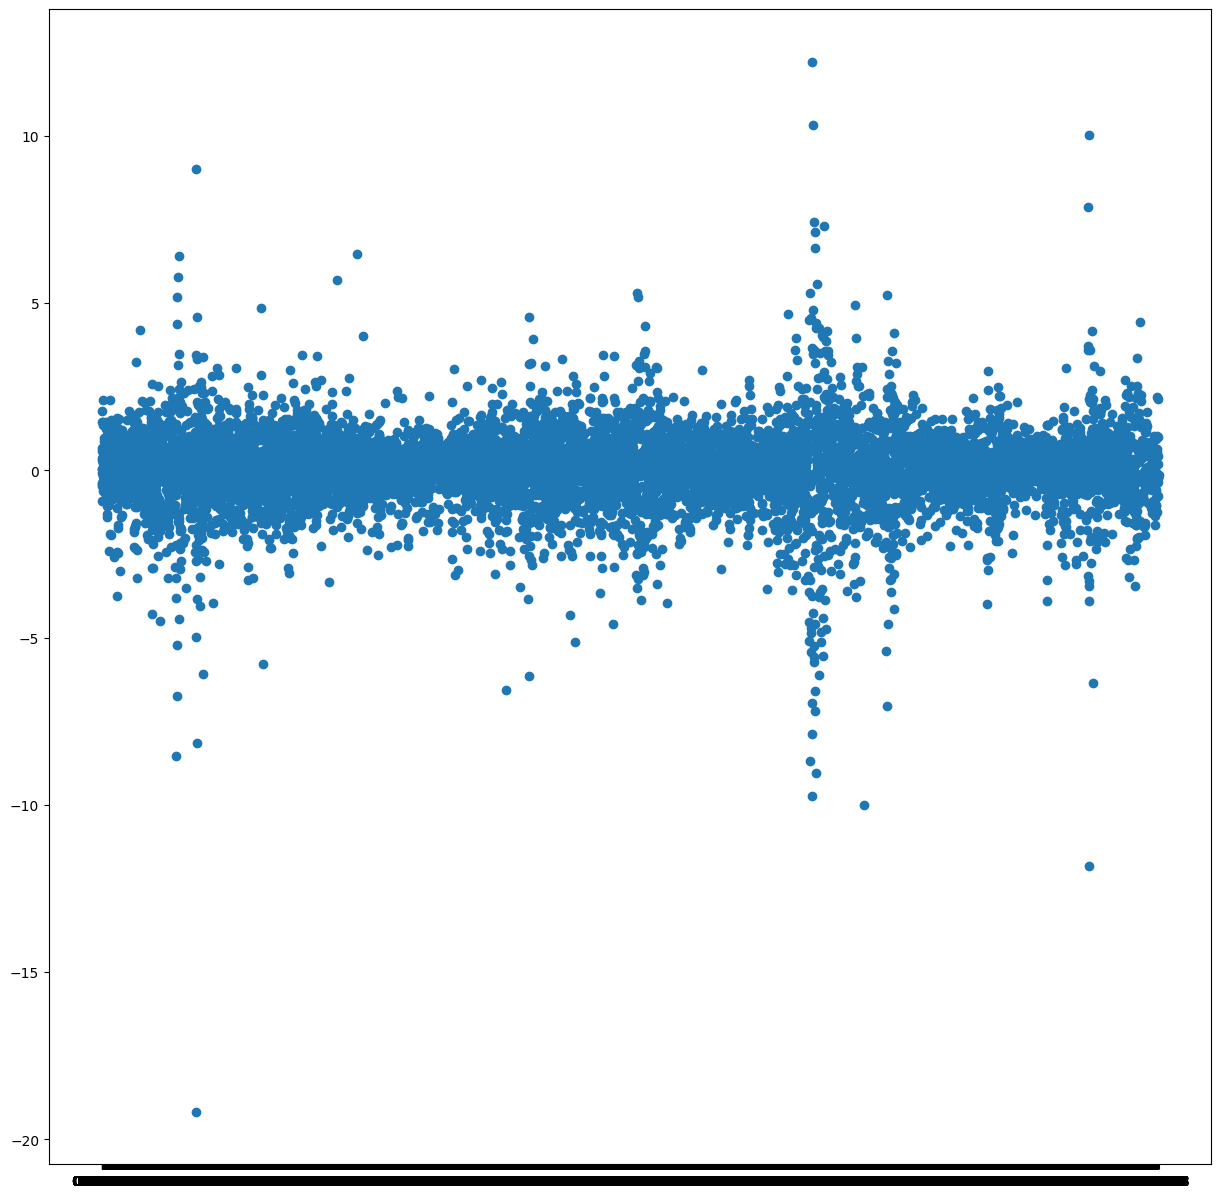

In [8]:
plt.figure(figsize=(15,15))

plt.scatter(x=NYSE_Weather['Hours_of_Sunlight'], y=NYSE_Weather['Returns'])

In [29]:
#NYSE_Weather['Hours_of_Sunlight'] = NYSE_Weather['Hours_of_Sunlight'].apply(lambda x: x.time())
#NYSE_Weather['Hours_of_Sunlight'] = [datetime.strptime(NYSE_Weather['Hours_of_Sunlight'], "%H:%M:%S").time() for NYSE_Weather['Hours_of_Sunlight'] in NYSE_Weather['Hours_of_Sunlight']]
NYSE_Weather['Hours_of_Sunlight'] = pd.to_datetime(NYSE_Weather['Hours_of_Sunlight'], format='%H:%M:%S').dt.time


In [56]:
avg_return = NYSE_Weather['Returns'].groupby(NYSE_Weather['Date'].dt.month).mean()

# Convert 'Hours_of_Sunlight' to timedelta
NYSE_Weather['Hours_of_Sunlight'] = pd.to_timedelta(NYSE_Weather['Hours_of_Sunlight'])

# Group by month and calculate the mean
avg_sunlight = NYSE_Weather.groupby(NYSE_Weather['Date'].dt.month)['Hours_of_Sunlight'].mean()
#avg_sunlight = avg_sunlight.apply(lambda x: str(x).split()[2])

avg_sunlight_hours = avg_sunlight.dt.total_seconds() / 3600
avg_sunlight

Date
1    0 days 09:39:17.951371571
2    0 days 10:39:37.815261044
3    0 days 11:57:43.722482435
4    0 days 13:19:36.336645962
5    0 days 14:26:51.105454545
6    0 days 15:02:30.619447779
7    0 days 14:44:12.521844660
8    0 days 13:44:38.703703703
9    0 days 12:25:31.863636363
10   0 days 11:06:24.809523809
11   0 days 09:56:26.160353535
12   0 days 09:18:44.481942714
Name: Hours_of_Sunlight, dtype: timedelta64[ns]

<Axes: xlabel='Date', ylabel='Hours_of_Sunlight'>

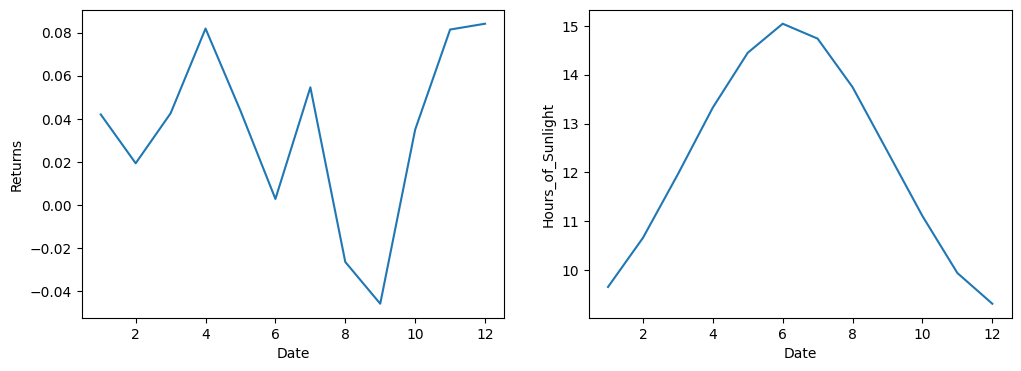

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.lineplot(ax=axes[0], data= avg_return)
sns.lineplot(ax=axes[1], data= avg_sunlight_hours)

#axes[0].set_title = ('Returns')

In [60]:


# Print the results
print(avg_sunlight_hours)

Date
1      9.654986
2     10.660504
3     11.962145
4     13.326760
5     14.447529
6     15.041839
7     14.736812
8     13.744084
9     12.425518
10    11.106892
11     9.940600
12     9.312356
Name: Hours_of_Sunlight, dtype: float64
